In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

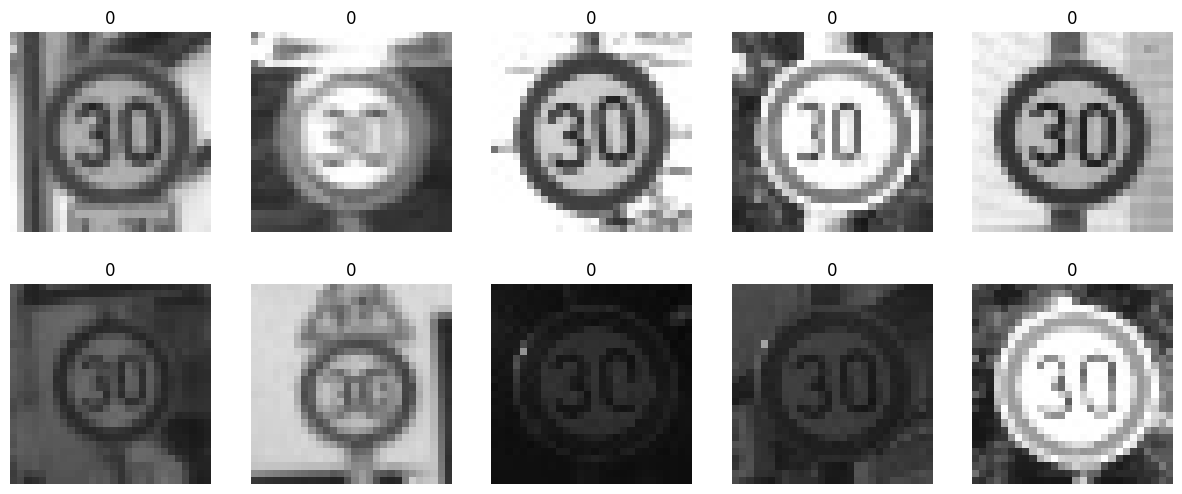

In [2]:
folder = "data/subset_homework/"

fnames_0 = os.listdir(os.path.join(folder, "class_id_0"))
images_0 = [
    cv2.imread(os.path.join(folder, "class_id_0", f), cv2.IMREAD_UNCHANGED)
    for f in fnames_0
]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_0[idx], cmap="gray", vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

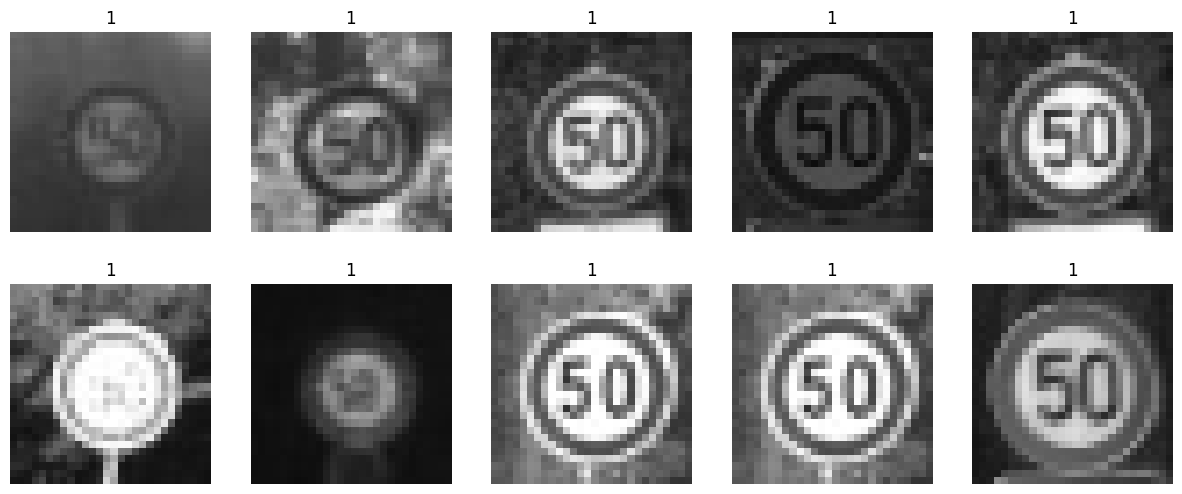

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
pixels = np.array([image.flatten() for image in images]) / 255
print("Shape", pixels.shape)

Shape (4470, 784)


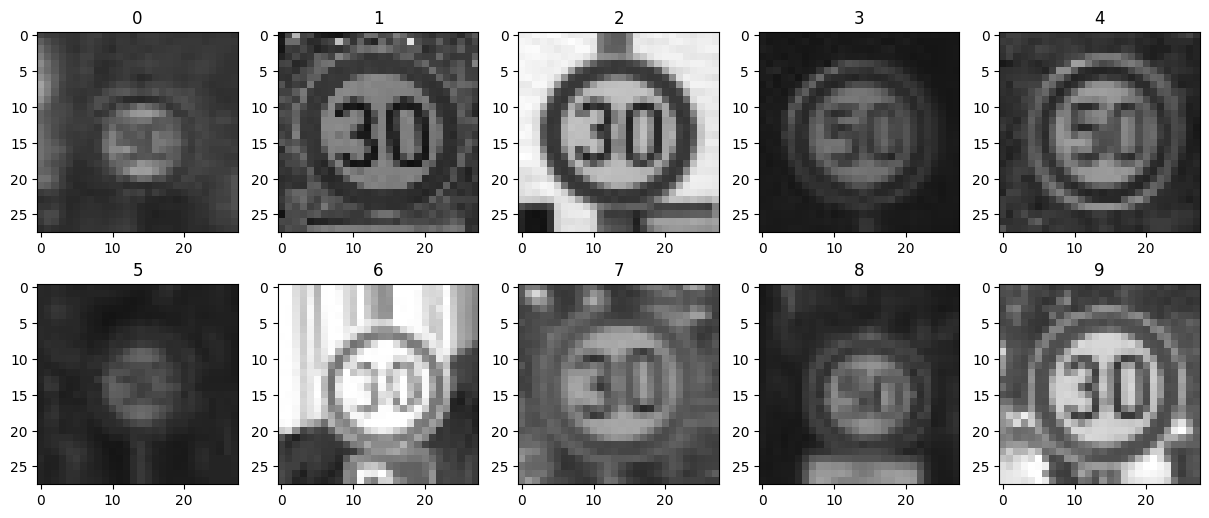

In [7]:
for cnt, idx in enumerate(np.random.randint(0, len(images) - 10, 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[cnt], cmap="gray", vmin=0, vmax=255)
    plt.title(cnt)

In [8]:
import tensorflow as tf


In [9]:
inputs = tf.keras.layers.Input(shape=(pixels[0].shape))
outputs = tf.keras.layers.Dense(1, activation='linear')(inputs)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [12]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3898  
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2540
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2075
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1768
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1523
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1390
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1290
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1180
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1098
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1032


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

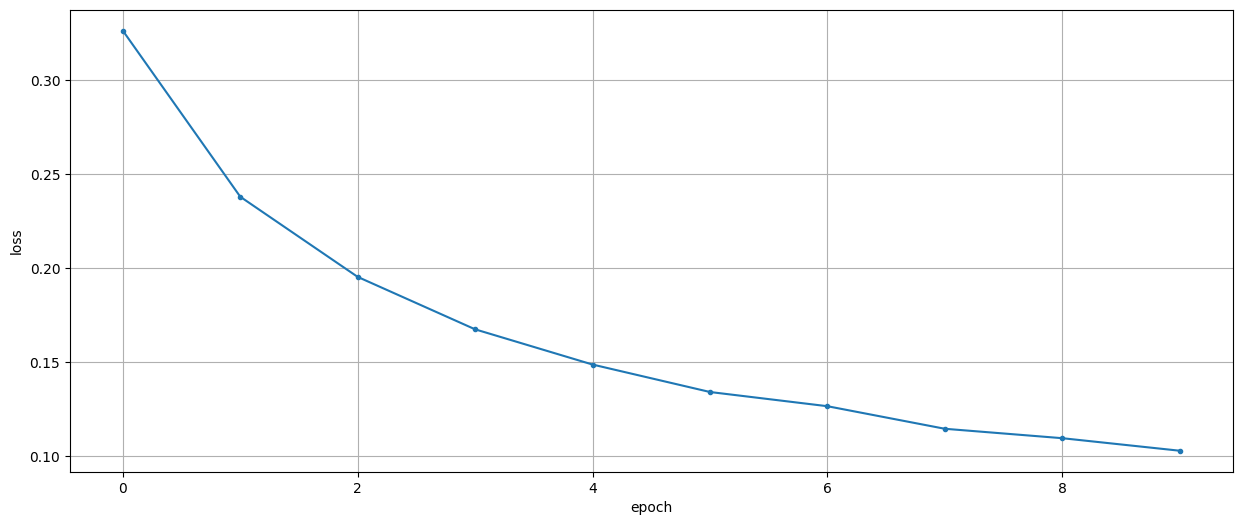

In [13]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.39717323] [0.39717323]


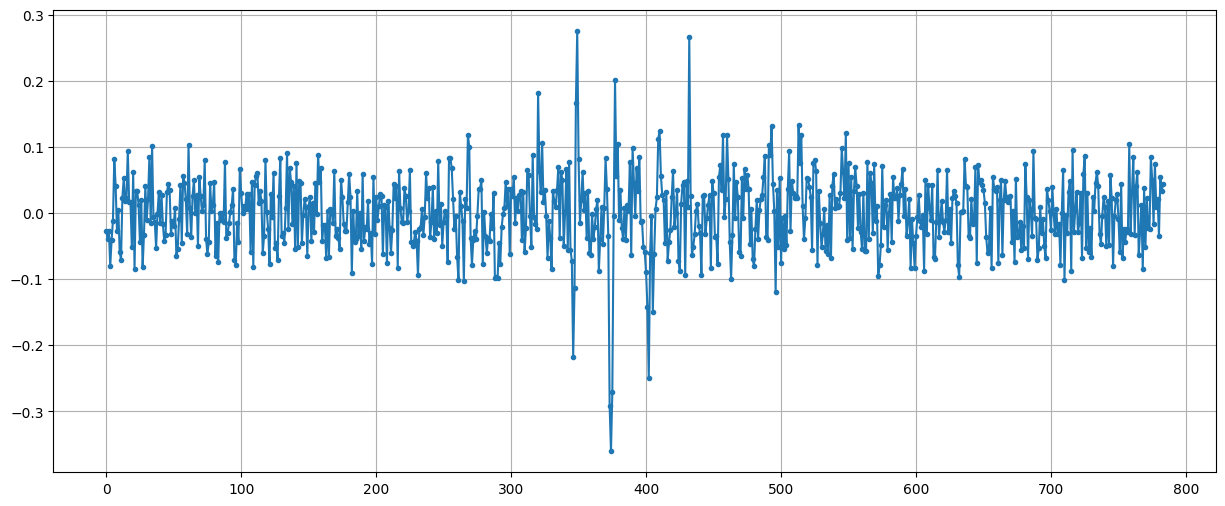

In [14]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [15]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
Accuracy 0.8868008948545861


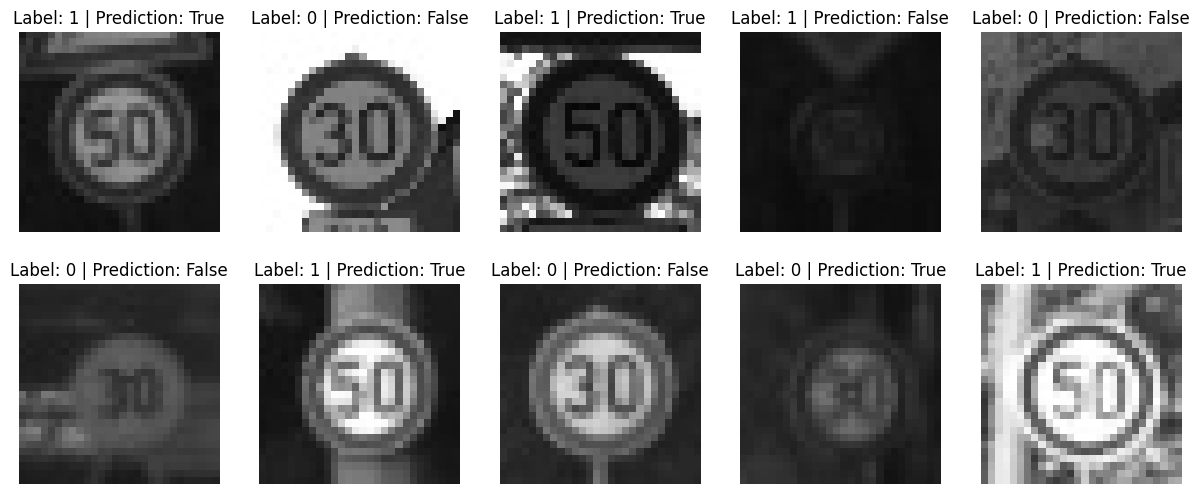

In [16]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

As we can see the accuracy is very bad, let's try to modify the network

In [21]:
inputs = tf.keras.layers.Input(shape=(pixels[0].shape))
outputs = tf.keras.layers.Dense(16, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(16, activation='relu')(outputs)
outputs = tf.keras.layers.Dense(16, activation='relu')(outputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(outputs)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,121 (51.25 KB)

 Trainable params: 13,121 (51.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2815
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1955
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1428
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1122
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0925
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0808
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0659
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0605
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0589
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0502


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

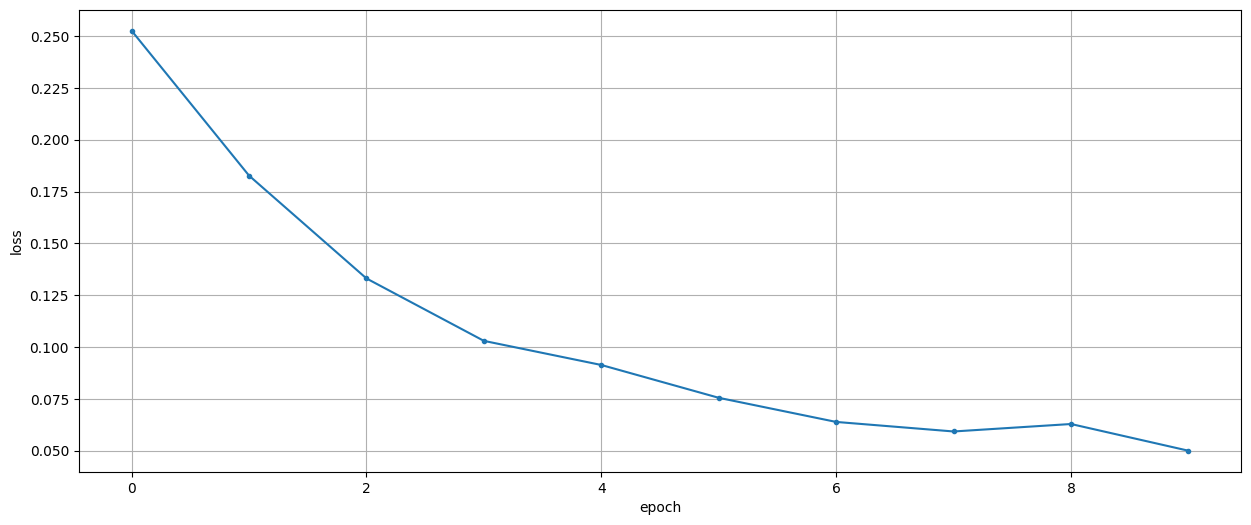

In [23]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [24]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('New accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
New accuracy 0.9478747203579418


# Results
As we can see, if we add more neurons and more layers we can achieve around 95% accuracy.